In [1]:
# Business Idea of Bike Buyer Project

#We have to study what factors really effect the person to buy a bike.
#DATA UNDERSTADING
#we have only one input file that is having 6996 rows 12 columns All the columns are related to person information like Marital Status of the person, person Gender, Yearly Income, Number of Children, Education,Occupation, Home Owner, Cars, Commute Distance, Region, Age,Bike Buyer (This column contains yes|No )
#we did exploratory Data Analysis to find out which variable influences the bike buyer to buy a bike and how.

#Data preperation
#we checked for missing values outliers and coverted required variables to factor type.Since we performed the 
# Classification Models Logistic  and Regression Model we encoded  all the categorical variables in the input dataset regression model and logistic model they only take numerical values.

#Data Modeling
 #we used Classification Models ( Logistic , k-NN , SVM , Decision Tree) and Regression Model and divided into train and test set
    

In [2]:
import os
os.getcwd()

'C:\\Users\\Harsha\\Downloads'

In [3]:
os.chdir("C:\\Users\\Harsha\\Downloads")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#data=pd.read_csv('bikebuyer.csv')
data1=pd.read_csv('bikebuyer1 (1).csv',encoding = "cp1252")

# Data Cleaning

In [6]:
data1

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,4.0,Married,NaN,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,NaN,Pacific,49,Yes
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,17974.0,NaN,Female,0,NaN,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


In [7]:
#examine yearly income(0 cant be yearly income so it is outlier)
data1['Yearly Income'].min()

0

In [8]:
data1['Yearly Income'].max()

170000

In [9]:
#mean<meadian (most of the values are left side towards mean)right skewed
data1['Yearly Income'].mean()

57020.151493497215

In [10]:
data1['Yearly Income'].median()

60000.0

In [11]:
np.std(data1['Yearly Income'])

32078.15719490367

In [12]:
np.var(data1['Yearly Income'])

1029008169.0209501

In [13]:
#Examine Gender
data1['Gender'].count()

6968

In [14]:
#male are more
data1['Gender'].value_counts()

Male      3527
Female    3441
Name: Gender, dtype: int64

In [15]:
#Get a count of missing values in the dataset(lambda checks all null values along axis(axis can be row or column byextending lamda function))
data1.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status      16
Gender              29
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [16]:
#examine marital status
data1['Marital Status'].value_counts()

Married    4133
Single     2848
Name: Marital Status, dtype: int64

In [17]:
data1 ['Marital Status'].fillna('Married',inplace=True)
data1['Gender'].value_counts()

Male      3527
Female    3441
Name: Gender, dtype: int64

In [18]:
#after imputation get count of missing values
data1.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status       0
Gender              29
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [19]:
data1 ['Gender'].fillna('Male',inplace=True)

In [20]:
data1.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status       0
Gender               0
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [21]:
data1['Children'].mean()

1.1116205760137556

In [22]:
data1['Children'].median()

0.0

In [23]:
data1 ['Children'].fillna(1,inplace=True)

In [24]:
data1.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status       0
Gender               0
Yearly Income        0
Children             0
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [25]:
data1['Commute Distance'].mean()

4.210103329506315

In [26]:
data1['Commute Distance'].median()

4.0

In [27]:
data1 ['Commute Distance'].fillna(4.0,inplace=True)

In [28]:
data1.apply(lambda x: sum(x.isnull()),axis=0)

ID                  1
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [29]:
data1

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,17974.0,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


# Data Analysis

//count displays the total number of non-empty entries
//Average displays the average of all the entries of a particular field
//standard deviation tells how the data points are connected to other data points.The basic thing here we have to 
understand here is if the std value is low the more consistent the data is.
//minimum gives the minimum of all entries of a particular field.
//maximum gives the maximum of all entries of a particular field.
//the percentile values give the respective percentile values of a particular field.
data1.describe()

# we measure the strength of assosciation of the data items with the covarience
#The range of values of covarience lies between -1 to +1 and 0 to 1
#If there is a positive correlation between the two data items then they are highly assosciated with each other(one 
#increases the other data item which is asosciated also increaeses)
#If the co-varience value is negative then the data items are not assosciated with the each other if one increases other
#decreases
#By our observation in the following data items there is  negative covarience between some data items and positive corelation between some data items so there is only positive corelation all
#the data items
data1.cov()


//correlation shows how the data items are close to each other.This gives the strength of Assosciation between the 
variables
//If the correlation value is 0 between the two dataitems then there is no relation
//If the correlation value is +1 between the two dataitems then there is high relation
//If the correlation value is -1 between the two dataitems then there is low relation
//The correlation value of the two same data items is always equal to one


In [30]:
data1.corr()

,ID,Yearly Income,Children,Cars,Commute Distance,Age
ID,1.000000,-0.006802,0.011989,0.068315,0.011544,0.021135
Yearly Income,-0.006802,1.000000,0.474142,0.472089,0.009403,0.195351
Children,0.011989,0.474142,1.000000,0.447856,0.026268,-0.000492
Cars,0.068315,0.472089,0.447856,1.000000,0.018435,0.141093
Commute Distance,0.011544,0.009403,0.026268,0.018435,1.000000,-0.026026
Age,0.021135,0.195351,-0.000492,0.141093,-0.026026,1.000000


getting the top 5 rows in datasets we observe that each member have different ID different yearly income their gender(male|female),number of children are not distinct,education status is also not distinct,occupation is not distinct,Home owner(yes|no) number of cars they have,region,age all these may not be distinct,commute distance is also not distinct,
commute distance first two members have the same ,Bike Buyer(yes|no)


In [31]:
data1.head()

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes


//getting the bottom 5 rows in datasets we observe that each member have different ID different yearly income their gender(male|female),number of children are not distinct,education status is also not distinct,occupation is not distinct,Home owner(yes|no) number of cars they have,region,age all these may not be distinct,commute distance is also not distinct,
 Bike Buyer(yes|no)
data1.tail()

//getting the top 4 rows in datasets we observe that each member have different ID different yearly income their gender(male|female),number of children are not distinct,education status is also not distinct,occupation is not distinct,Home owner(yes|no) number of cars they have,region,age all these may not be distinct,commute distance is also not distinct,
commute distance first two members have the same ,Bike Buyer(yes|no)
data1.head(n=4)

In [32]:
#to know the headers
data1.columns

Index(['ID', 'Marital Status', 'Gender', 'Yearly Income', 'Children',
       'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance',
       'Region', 'Age', 'Bike Buyer'],
      dtype='object')

In [33]:
#display the datatypes of attributes
data1.dtypes

ID                  float64
Marital Status       object
Gender               object
Yearly Income         int64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                  int64
Commute Distance    float64
Region               object
Age                   int64
Bike Buyer           object
dtype: object

In [34]:
data1['Age'].unique()

array([33, 37, 55, 47, 38, 40, 49, 46, 64, 31, 50, 44, 39, 51, 48, 45, 43,
       41, 62, 42, 30, 63, 71, 58, 67, 26, 27, 28, 35, 65, 68, 52, 29, 36,
       32, 34, 60, 56, 54, 61, 66, 59, 57, 53, 25, 73, 69, 70, 76, 75, 80,
       82, 72, 74, 96, 78, 77, 84, 94, 86, 85, 90, 93, 95, 87, 83, 89, 79],
      dtype=int64)

In [35]:
data1['Education'].unique()

array(['Partial College', 'Graduate Degree', 'Bachelors', 'High School',
       'Partial High School'], dtype=object)

In [36]:
data1['Region'].unique()

array(['Europe', 'Pacific', 'North America'], dtype=object)

In [37]:
data1['Occupation'].unique()

array(['Clerical', 'Professional', 'Management', 'Skilled Manual',
       'Manual'], dtype=object)

In [38]:
data1['Commute Distance'].unique()

array([ 1.,  2.,  5.,  4., 10., 11.,  6., 12.,  9.,  8., 13.,  3.,  7.])

In [39]:
#first value number of rows and second value is number of columns
data1.shape

(6997, 13)

In [40]:
data1[data1['Gender'].str.contains('Male')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
14,11091.0,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No


In [41]:
data1[data1['Gender'].str.contains('Female')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,17974.0,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
11,11087.0,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
13,14902.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
17,16366.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes


In [42]:
data1[data1['Gender'].str.contains('Female')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
8,17974.0,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
13,14902.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
17,16366.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
23,26529.0,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes


In [43]:
data1[data1['Gender'].str.contains('Male')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
31,11104.0,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
33,20824.0,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
44,27744.0,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
45,13949.0,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
48,27472.0,Single,Male,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes
50,17600.0,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes


In [44]:
data1[data1['Gender'].str.contains('Female')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
11,11087.0,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
19,11098.0,Married,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
24,11114.0,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
38,11125.0,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No
39,11127.0,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,1.0,North America,31,No
43,11128.0,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,5.0,North America,30,No
46,11130.0,Married,Female,30000,0.0,High School,Skilled Manual,Yes,2,5.0,North America,26,No
49,11131.0,Married,Female,30000,0.0,High School,Skilled Manual,No,2,1.0,North America,26,No
51,28884.0,Single,Female,170000,3.0,High School,Professional,No,4,13.0,Europe,50,No


In [45]:
data1[data1['Gender'].str.contains('Male')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
14,11091.0,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
22,11113.0,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
26,11115.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,11116.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No


In [46]:
data1[data1['Marital Status'].str.contains('Single')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
25,23612.0,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
30,11103.0,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes


In [47]:
data1[data1['Marital Status'].str.contains('Single')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
24,11114.0,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
28,11118.0,Single,Male,80000,1.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
34,11119.0,Single,Male,30000,0.0,Partial College,Clerical,No,2,2.0,Pacific,71,No
38,11125.0,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No
51,28884.0,Single,Female,170000,3.0,High School,Professional,No,4,13.0,Europe,50,No


In [48]:
data1[data1['Marital Status'].str.contains('Married')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
8,17974.0,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
13,14902.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,16366.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,26529.0,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
31,11104.0,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
41,19869.0,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
42,16909.0,Married,Female,90000,0.0,Bachelors,Management,Yes,2,1.0,North America,67,Yes
44,27744.0,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes


In [49]:
data1[data1['Marital Status'].str.contains('Married')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
11,11087.0,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
14,11091.0,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
19,11098.0,Married,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
22,11113.0,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
26,11115.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,11116.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
35,11121.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,11122.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No


In [50]:
data1[data1['Home Owner'].str.contains('Yes')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
8,17974.0,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
13,14902.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
17,16366.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
23,26529.0,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes


In [51]:
data1[data1['Home Owner'].str.contains('No')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
25,23612.0,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
31,11104.0,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
32,15834.0,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
40,21969.0,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
47,14130.0,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
66,11144.0,Single,Male,40000,0.0,High School,Skilled Manual,No,2,6.0,North America,27,Yes


In [52]:
data1[data1['Home Owner'].str.contains('No')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
11,11087.0,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
19,11098.0,Married,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
28,11118.0,Single,Male,80000,1.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
34,11119.0,Single,Male,30000,0.0,Partial College,Clerical,No,2,2.0,Pacific,71,No
49,11131.0,Married,Female,30000,0.0,High School,Skilled Manual,No,2,1.0,North America,26,No
51,28884.0,Single,Female,170000,3.0,High School,Professional,No,4,13.0,Europe,50,No


In [53]:
data1[data1['Home Owner'].str.contains('Yes')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
14,11091.0,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
22,11113.0,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
24,11114.0,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
26,11115.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,11116.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
35,11121.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,11122.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No


In [54]:
data1[data1['Home Owner'].str.contains('Yes')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
8,17974.0,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
13,14902.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
17,16366.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
23,26529.0,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes


In [55]:
data1[data1['Region'].str.contains('Europe')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
8,17974.0,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
25,23612.0,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,20824.0,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
76,15920.0,Single,Male,100000,3.0,Partial College,Professional,Yes,4,6.0,Europe,49,Yes
77,27792.0,Single,Female,20000,1.0,High School,Manual,Yes,1,7.0,Europe,43,Yes
79,20859.0,Single,Male,30000,0.0,Bachelors,Clerical,No,0,4.0,Europe,37,Yes


In [56]:
data1[data1['Region'].str.contains('Europe')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
51,28884.0,Single,Female,170000,3.0,High School,Professional,No,4,13.0,Europe,50,No
141,28877.0,Single,Male,150000,3.0,High School,Professional,No,4,2.0,Europe,48,No
234,11248.0,Married,Male,110000,4.0,Partial College,Professional,Yes,4,1.0,Europe,51,No
278,29444.0,Married,Female,20000,0.0,Bachelors,Clerical,Yes,0,6.0,Europe,50,No
317,11342.0,Married,Male,30000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,44,No
320,11347.0,Married,Male,10000,0.0,Partial College,Manual,Yes,1,1.0,Europe,50,No
321,11348.0,Married,Male,10000,0.0,Partial College,Manual,Yes,1,1.0,Europe,51,No
322,11349.0,Married,Female,10000,0.0,Partial College,Manual,Yes,1,1.0,Europe,52,No
323,11350.0,Married,Female,30000,0.0,Graduate Degree,Clerical,Yes,0,6.0,Europe,69,No


In [57]:
data1[data1['Region'].str.contains('Pacific')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
30,11103.0,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
31,11104.0,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
40,21969.0,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
44,27744.0,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
47,14130.0,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
48,27472.0,Single,Male,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes
54,18220.0,Married,Male,110000,5.0,Partial High School,Professional,Yes,4,4.0,Pacific,35,Yes
55,24503.0,Married,Female,40000,0.0,Bachelors,Management,Yes,2,2.0,Pacific,65,Yes


In [58]:
data1[data1['Region'].str.contains('Pacific')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
19,11098.0,Married,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
22,11113.0,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
24,11114.0,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
26,11115.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,11116.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
28,11118.0,Single,Male,80000,1.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
34,11119.0,Single,Male,30000,0.0,Partial College,Clerical,No,2,2.0,Pacific,71,No


In [59]:
data1[data1['Region'].str.contains('North America')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
13,14902.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
17,16366.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
23,26529.0,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
32,15834.0,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
41,19869.0,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
42,16909.0,Married,Female,90000,0.0,Bachelors,Management,Yes,2,1.0,North America,67,Yes


In [60]:
data1[data1['Region'].str.contains('North America')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
11,11087.0,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
14,11091.0,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
39,11127.0,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,1.0,North America,31,No
43,11128.0,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,5.0,North America,30,No
46,11130.0,Married,Female,30000,0.0,High School,Skilled Manual,Yes,2,5.0,North America,26,No
49,11131.0,Married,Female,30000,0.0,High School,Skilled Manual,No,2,1.0,North America,26,No
52,11137.0,Married,Female,40000,0.0,High School,Skilled Manual,Yes,2,1.0,North America,28,No


In [61]:
data1[data1['Occupation'].str.contains('Clerical')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
8,17974.0,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
13,14902.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,16366.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,20824.0,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
47,14130.0,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
48,27472.0,Single,Male,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes


In [62]:
data1[data1['Occupation'].str.contains('Clerical')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
34,11119.0,Single,Male,30000,0.0,Partial College,Clerical,No,2,2.0,Pacific,71,No
56,11139.0,Single,Female,30000,0.0,Partial College,Clerical,No,2,3.0,Pacific,68,No
59,11140.0,Single,Male,30000,0.0,Partial High School,Clerical,No,2,5.0,North America,29,No
278,29444.0,Married,Female,20000,0.0,Bachelors,Clerical,Yes,0,6.0,Europe,50,No
317,11342.0,Married,Male,30000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,44,No
323,11350.0,Married,Female,30000,0.0,Graduate Degree,Clerical,Yes,0,6.0,Europe,69,No
328,11355.0,Married,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,8.0,Europe,63,No
336,11366.0,Married,Female,20000,0.0,Bachelors,Clerical,Yes,0,5.0,Pacific,27,No
342,11367.0,Married,Male,20000,0.0,Bachelors,Clerical,Yes,0,1.0,Pacific,27,No
344,11369.0,Married,Female,20000,0.0,Bachelors,Clerical,No,0,1.0,Pacific,28,No


In [63]:
data1[data1['Occupation'].str.contains('Management')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
42,16909.0,Married,Female,90000,0.0,Bachelors,Management,Yes,2,1.0,North America,67,Yes
44,27744.0,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
55,24503.0,Married,Female,40000,0.0,Bachelors,Management,Yes,2,2.0,Pacific,65,Yes
84,14438.0,Single,Female,100000,1.0,Bachelors,Management,Yes,4,7.0,North America,41,Yes
85,11167.0,Single,Female,80000,0.0,Bachelors,Management,No,1,8.0,North America,34,Yes
90,19652.0,Single,Male,40000,0.0,Bachelors,Management,Yes,2,4.0,Pacific,63,Yes
96,21479.0,Married,Male,60000,1.0,Bachelors,Management,Yes,0,2.0,North America,58,Yes
103,20221.0,Married,Female,120000,0.0,Graduate Degree,Management,No,0,1.0,Pacific,37,Yes
107,27517.0,Married,Male,100000,1.0,Bachelors,Management,Yes,3,1.0,Pacific,47,Yes
110,15417.0,Single,Male,70000,0.0,Graduate Degree,Management,Yes,2,1.0,North America,65,Yes


In [64]:
data1[data1['Occupation'].str.contains('Management')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
67,11146.0,Single,Female,40000,0.0,Bachelors,Management,Yes,2,4.0,Pacific,67,No
69,11148.0,Married,Male,40000,0.0,Bachelors,Management,Yes,2,3.0,Pacific,65,No
70,11149.0,Married,Male,40000,0.0,Bachelors,Management,Yes,2,7.0,Pacific,65,No
71,11150.0,Single,Male,40000,0.0,Bachelors,Management,Yes,2,8.0,Pacific,65,No
97,29120.0,Single,Female,100000,0.0,Bachelors,Management,Yes,4,3.0,Pacific,48,No
101,11169.0,Married,Male,90000,4.0,Bachelors,Management,Yes,1,1.0,North America,38,No
102,11170.0,Married,Female,90000,4.0,Bachelors,Management,Yes,1,2.0,North America,38,No


In [65]:
data1[data1['Occupation'].str.contains('Skilled Manual')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
32,15834.0,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
57,11129.0,Single,Female,40000,0.0,High School,Skilled Manual,Yes,1,4.0,North America,31,Yes
61,29350.0,Single,Female,50000,3.0,Bachelors,Skilled Manual,Yes,2,7.0,North America,41,Yes
62,23339.0,Single,Female,60000,0.0,Partial College,Skilled Manual,Yes,2,8.0,North America,33,Yes
64,18859.0,Married,Female,60000,0.0,Partial High School,Skilled Manual,Yes,2,2.0,North America,52,Yes
66,11144.0,Single,Male,40000,0.0,High School,Skilled Manual,No,2,6.0,North America,27,Yes
68,15865.0,Single,Female,40000,4.0,High School,Skilled Manual,Yes,3,2.0,North America,35,Yes


In [66]:
data1[data1['Occupation'].str.contains('Skilled Manual')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
19,11098.0,Married,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
24,11114.0,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
26,11115.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,11116.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
28,11118.0,Single,Male,80000,1.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
35,11121.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,11122.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No
37,11123.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,46,No
38,11125.0,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No


In [67]:
data1[data1['Occupation'].str.contains('Professional')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
23,26529.0,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
25,23612.0,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
30,11103.0,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
31,11104.0,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
40,21969.0,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
41,19869.0,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
45,13949.0,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
50,17600.0,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes


In [68]:
data1[data1['Occupation'].str.contains('Professional')&
      data1['Bike Buyer'].str.contains('No')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
11,11087.0,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
14,11091.0,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
22,11113.0,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
51,28884.0,Single,Female,170000,3.0,High School,Professional,No,4,13.0,Europe,50,No
141,28877.0,Single,Male,150000,3.0,High School,Professional,No,4,2.0,Europe,48,No
169,11203.0,Married,Male,40000,1.0,High School,Professional,Yes,2,1.0,North America,58,No
172,11204.0,Married,Female,40000,1.0,High School,Professional,Yes,2,7.0,North America,58,No


In [69]:
data1[data1['Occupation'].str.contains('Professional')&
      data1['Bike Buyer'].str.contains('Yes')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
23,26529.0,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
25,23612.0,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
30,11103.0,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
31,11104.0,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
40,21969.0,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
41,19869.0,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
45,13949.0,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
50,17600.0,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes


In [70]:

data1[data1['Occupation'].str.contains('Manual')&
      data1['Bike Buyer'].str.contains('Yes')]


,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
32,15834.0,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
57,11129.0,Single,Female,40000,0.0,High School,Skilled Manual,Yes,1,4.0,North America,31,Yes
61,29350.0,Single,Female,50000,3.0,Bachelors,Skilled Manual,Yes,2,7.0,North America,41,Yes
62,23339.0,Single,Female,60000,0.0,Partial College,Skilled Manual,Yes,2,8.0,North America,33,Yes
64,18859.0,Married,Female,60000,0.0,Partial High School,Skilled Manual,Yes,2,2.0,North America,52,Yes
66,11144.0,Single,Male,40000,0.0,High School,Skilled Manual,No,2,6.0,North America,27,Yes


In [71]:
data1[data1['Occupation'].str.contains('Manual')&
      data1['Bike Buyer'].str.contains('No')]


,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
19,11098.0,Married,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
24,11114.0,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
26,11115.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,11116.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
28,11118.0,Single,Male,80000,1.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
35,11121.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,11122.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No
37,11123.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,46,No
38,11125.0,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No


In [72]:
data1[data1['Gender'].str.contains('Female')&
      data1['Region'].str.contains('North America')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
4,25410.0,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
11,11087.0,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
13,14902.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
17,16366.0,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,26529.0,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
32,15834.0,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
39,11127.0,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,1.0,North America,31,No
41,19869.0,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes


In [73]:
data1[data1['Gender'].str.contains('Female')&
      data1['Region'].str.contains('Pacific')]


,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
19,11098.0,Married,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
24,11114.0,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
30,11103.0,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
38,11125.0,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No
40,21969.0,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
47,14130.0,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
55,24503.0,Married,Female,40000,0.0,Bachelors,Management,Yes,2,2.0,Pacific,65,Yes
56,11139.0,Single,Female,30000,0.0,Partial College,Clerical,No,2,3.0,Pacific,68,No


In [74]:
data1[data1['Gender'].str.contains('Male')&
      data1['Region'].str.contains('Europe')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,20824.0,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
76,15920.0,Single,Male,100000,3.0,Partial College,Professional,Yes,4,6.0,Europe,49,Yes
79,20859.0,Single,Male,30000,0.0,Bachelors,Clerical,No,0,4.0,Europe,37,Yes
82,23763.0,Married,Male,40000,1.0,Bachelors,Skilled Manual,Yes,1,5.0,Europe,34,Yes
88,27179.0,Single,Male,30000,0.0,High School,Manual,No,1,3.0,Europe,35,Yes
108,15055.0,Married,Male,20000,0.0,Partial College,Manual,Yes,1,1.0,Europe,47,Yes
113,27143.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,2.0,Europe,38,Yes


In [75]:
data1[data1['Gender'].str.contains('Male')&
      data1['Region'].str.contains('Pacific')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
22,11113.0,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
26,11115.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,11116.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
28,11118.0,Single,Male,80000,1.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
31,11104.0,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
34,11119.0,Single,Male,30000,0.0,Partial College,Clerical,No,2,2.0,Pacific,71,No
35,11121.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No


In [76]:
data1[data1['Gender'].str.contains('Male')&
      data1['Region'].str.contains('North America')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
14,11091.0,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
45,13949.0,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
50,17600.0,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes
58,13726.0,Married,Male,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,52,Yes
59,11140.0,Single,Male,30000,0.0,Partial High School,Clerical,No,2,5.0,North America,29,No
63,11142.0,Single,Male,40000,0.0,High School,Skilled Manual,No,2,1.0,North America,29,No


In [77]:
data1[data1['Gender'].str.contains('Male')&
      data1['Marital Status'].str.contains('Married')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
5,4.0,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
14,11091.0,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
22,11113.0,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
26,11115.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,11116.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
31,11104.0,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
35,11121.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,11122.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No
37,11123.0,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,46,No


In [78]:
data1[data1['Gender'].str.contains('Male')&
      data1['Marital Status'].str.contains('Single')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
28,11118.0,Single,Male,80000,1.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,20824.0,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes


In [79]:
data1[data1['Gender'].str.contains('Female')&
      data1['Marital Status'].str.contains('Single')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
16,18568.0,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
20,18269.0,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
24,11114.0,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
25,23612.0,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
30,11103.0,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
32,15834.0,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
38,11125.0,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No


In [80]:
data1[data1['Gender'].str.contains('Male')&
      data1['Marital Status'].str.contains('Single')]

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
10,28985.0,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
12,20434.0,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
15,11094.0,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
18,20768.0,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
21,11102.0,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
28,11118.0,Single,Male,80000,1.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
29,19441.0,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,20824.0,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes


In [81]:
#examine yearly income(0 cant be yearly income so it is outlier)
data1['Yearly Income'].min()

0

In [82]:
data1['Yearly Income'].max()

170000

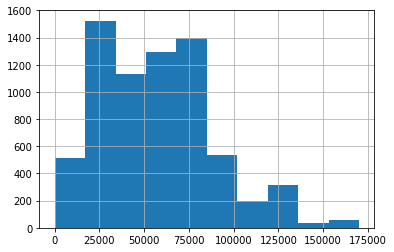

In [83]:
data1['Yearly Income'].hist(bins=10)

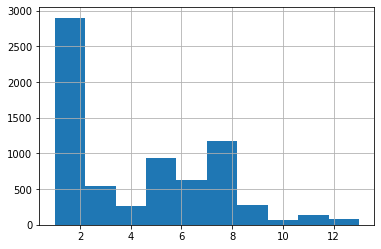

In [84]:
data1['Commute Distance'].hist(bins=10)

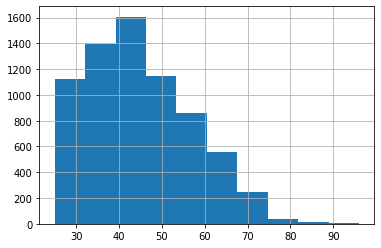

In [85]:
data1['Age'].hist(bins=10)

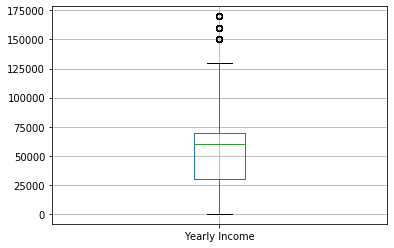

In [86]:
#min yearly income is 0
#lower hinge(25% yearly income ) is 26000
#median is 65000
#upper hinge(75%) is 70000
#max yearly income is 130000
data1.boxplot(column='Yearly Income')

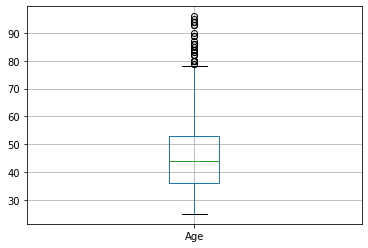

In [87]:
data1.boxplot(column='Age')

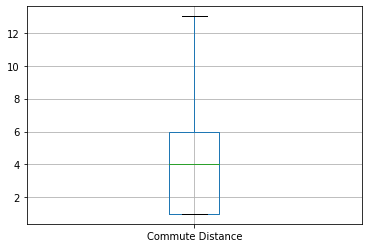

In [88]:
data1.boxplot(column='Commute Distance')

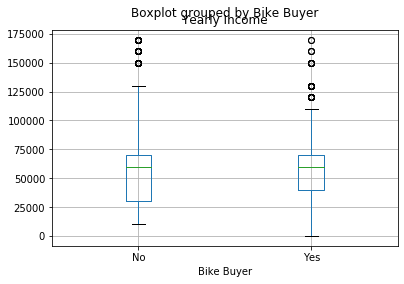

In [89]:
data1.boxplot(column='Yearly Income',by='Bike Buyer')

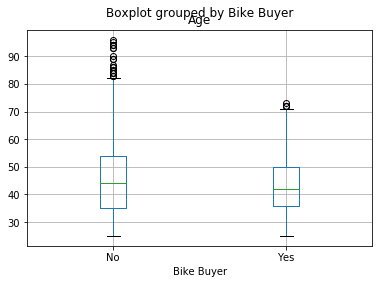

In [90]:
data1.boxplot(column='Age',by='Bike Buyer')

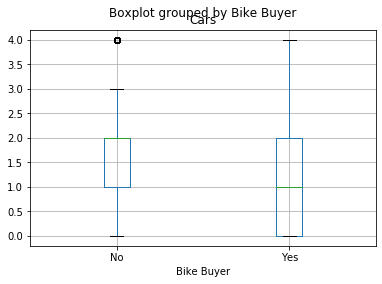

In [91]:
data1.boxplot(column='Cars',by='Bike Buyer')

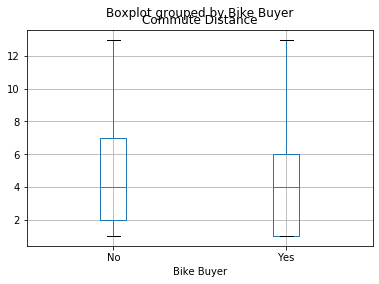

In [92]:
data1.boxplot(column='Commute Distance',by='Bike Buyer')

In [93]:
pd.crosstab(data1['Yearly Income'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Yearly Income,,,
0,0,2,2
10000,462,47,509
20000,608,82,690
30000,725,109,834
40000,748,158,906
50000,182,44,226
60000,1111,180,1291
70000,705,147,852
80000,480,68,548


In [94]:
pd.crosstab(data1['Marital Status'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Marital Status,,,
Married,3644,505,4149
Single,2353,495,2848
All,5997,1000,6997


In [95]:
pd.crosstab(data1['Gender'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Gender,,,
Female,2919,522,3441
Male,3078,478,3556
All,5997,1000,6997


In [96]:
pd.crosstab(data1['Yearly Income'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Yearly Income,,,
0,0,2,2
10000,462,47,509
20000,608,82,690
30000,725,109,834
40000,748,158,906
50000,182,44,226
60000,1111,180,1291
70000,705,147,852
80000,480,68,548


In [97]:
pd.crosstab(data1['Children'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Children,,,
0.0,3421,621,4042
1.0,804,133,937
2.0,454,102,556
3.0,480,51,531
4.0,479,42,521
5.0,359,51,410
All,5997,1000,6997


In [98]:
pd.crosstab(data1['Occupation'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Occupation,,,
Clerical,784,179,963
Management,1112,153,1265
Manual,887,103,990
Professional,1719,312,2031
Skilled Manual,1495,253,1748
All,5997,1000,6997


In [99]:
pd.crosstab(data1['Cars'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Cars,,,
0,1132,299,1431
1,1505,283,1788
2,2304,277,2581
3,552,83,635
4,504,58,562
All,5997,1000,6997


In [100]:
pd.crosstab(data1['Commute Distance'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Commute Distance,,,
1.0,1474,276,1750
2.0,1031,119,1150
3.0,481,62,543
4.0,189,70,259
5.0,759,172,931
6.0,536,96,632
7.0,686,82,768
8.0,362,41,403
9.0,267,15,282


In [101]:
pd.crosstab(data1['Region'],data1['Bike Buyer'],margins=True)


Bike Buyer,No,Yes,All
Region,,,
Europe,1815,281,2096
North America,3247,481,3728
Pacific,935,238,1173
All,5997,1000,6997


In [102]:
pd.crosstab(data1['Age'],data1['Bike Buyer'],margins=True)

Bike Buyer,No,Yes,All
Age,,,
25,12,1,13
26,86,12,98
27,113,18,131
28,129,25,154
29,153,7,160
30,194,13,207
31,163,25,188
32,157,16,173
33,167,28,195


# Multiple Linear Regression

In [103]:
data1=data1.drop(['ID'],axis=1)

In [104]:
#all independent variables are stored in one object called X
#dependent variable stored in one object called Y 


In [105]:
x=data1.iloc[:,:10].values
y=data1.iloc[:,11].values

In [106]:
x

array([['Single', 'Male', 30000, ..., 1, 1.0, 'Europe'],
       ['Married', 'Female', 40000, ..., 0, 1.0, 'Europe'],
       ['Married', 'Male', 160000, ..., 3, 2.0, 'Europe'],
       ...,
       ['Married', 'Female', 160000, ..., 2, 1.0, 'Europe'],
       ['Single', 'Female', 120000, ..., 3, 1.0, 'Europe'],
       ['Married', 'Male', 130000, ..., 3, 2.0, 'Europe']], dtype=object)

In [107]:
y

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [108]:
x

array([['Single', 'Male', 30000, ..., 1, 1.0, 'Europe'],
       ['Married', 'Female', 40000, ..., 0, 1.0, 'Europe'],
       ['Married', 'Male', 160000, ..., 3, 2.0, 'Europe'],
       ...,
       ['Married', 'Female', 160000, ..., 2, 1.0, 'Europe'],
       ['Single', 'Female', 120000, ..., 3, 1.0, 'Europe'],
       ['Married', 'Male', 130000, ..., 3, 2.0, 'Europe']], dtype=object)

In [109]:
x

array([['Single', 'Male', 30000, ..., 1, 1.0, 'Europe'],
       ['Married', 'Female', 40000, ..., 0, 1.0, 'Europe'],
       ['Married', 'Male', 160000, ..., 3, 2.0, 'Europe'],
       ...,
       ['Married', 'Female', 160000, ..., 2, 1.0, 'Europe'],
       ['Single', 'Female', 120000, ..., 3, 1.0, 'Europe'],
       ['Married', 'Male', 130000, ..., 3, 2.0, 'Europe']], dtype=object)

In [110]:
data1

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


In [111]:
#Here we are encoding the all categorical variables

In [112]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_0 = LabelEncoder()
x[:, 0] = labelencoder_X_0.fit_transform(x[:, 0])
labelencoder_X_1 = LabelEncoder()
x[:, 1] = labelencoder_X_1.fit_transform(x[:, 1])
labelencoder_X_2 = LabelEncoder()
x[:, 4] = labelencoder_X_2.fit_transform(x[:, 4])
labelencoder_X_3 = LabelEncoder()
x[:, 5] = labelencoder_X_3.fit_transform(x[:, 5])
labelencoder_X_4 = LabelEncoder()
x[:, 6] = labelencoder_X_4.fit_transform(x[:, 6])
labelencoder_X_5 = LabelEncoder()
x[:, 9] = labelencoder_X_5.fit_transform(x[:, 9])





In [113]:
onehotencoder = OneHotEncoder(categorical_features =[4])
x = onehotencoder.fit_transform(x).toarray()

C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [114]:
onehotencoder = OneHotEncoder(categorical_features =[5])
x = onehotencoder.fit_transform(x).toarray()

C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [115]:
onehotencoder = OneHotEncoder(categorical_features =[9])
x = onehotencoder.fit_transform(x).toarray()

C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [116]:
x

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 3., 2., 0.],
       ...,
       [0., 0., 0., ..., 2., 1., 0.],
       [0., 0., 0., ..., 3., 1., 0.],
       [0., 0., 0., ..., 3., 2., 0.]])

In [117]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y[:] = labelencoder.fit_transform(y[:])
onehotencoder1 = OneHotEncoder(categorical_features = [0])

In [118]:
y

array([1, 1, 0, ..., 0, 0, 0], dtype=object)

In [119]:
#splitting data into trainingset and test set(use scikit learn data set principle)

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [121]:
x_train

array([[1., 0., 0., ..., 2., 2., 1.],
       [1., 0., 0., ..., 4., 2., 2.],
       [0., 0., 0., ..., 0., 9., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 3., 8., 2.],
       [1., 0., 0., ..., 4., 9., 1.]])

In [122]:
x_test

array([[1., 0., 0., ..., 1., 5., 1.],
       [1., 0., 0., ..., 2., 1., 2.],
       [0., 1., 0., ..., 1., 6., 1.],
       ...,
       [1., 0., 0., ..., 0., 2., 0.],
       [1., 0., 0., ..., 1., 6., 2.],
       [1., 0., 0., ..., 0., 5., 1.]])

In [123]:
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=object)

In [124]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [125]:
#fitting multiple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
#predicting the test set results
y_pred=reg.predict(x_test)

In [127]:
#machine prediction are atmost 80% exactly correct 
y_pred

array([0.20090771, 0.07110718, 0.17213232, ..., 0.25384559, 0.27179827,
       0.16669157])

In [128]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [129]:
import numpy as np

In [130]:
data1

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,1
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,1
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,0
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,0
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,1
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,0
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,1
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,0
8,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,1
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,1


In [131]:
import statsmodels.formula.api as sm
x=np.append(arr=np.ones((6997,1)).astype(int),values = x, axis = 1)

In [132]:
x

array([[1., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 3., 2., 0.],
       ...,
       [1., 0., 0., ..., 2., 1., 0.],
       [1., 0., 0., ..., 3., 1., 0.],
       [1., 0., 0., ..., 3., 2., 0.]])

In [133]:
data1

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,1
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,1
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,0
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,0
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,1
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,0
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,1
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,0
8,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,1
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,1


In [134]:
#since  target variable is categorical so we cant implement OLS on this so we do Logistic regression

# kNN Classification

In [135]:
import pandas as pd
data2=pd.read_csv('bikebuyer1 (1).csv')

In [136]:
import numpy as np
from sklearn import preprocessing

In [137]:
data2=data2.drop(['ID'],axis=1)

In [138]:
data2 ['Marital Status'].fillna('Married',inplace=True)
data2['Gender'].value_counts()

Male      3527
Female    3441
Name: Gender, dtype: int64

In [139]:
data2 ['Gender'].fillna('Male',inplace=True)

In [140]:
data2 ['Children'].fillna(1,inplace=True)

In [141]:
data2 ['Commute Distance'].fillna(4.0,inplace=True)

In [142]:
data2

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,Married,Female,0,1.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


In [143]:
w=data2.iloc[:,:10].values
m=data2.iloc[:,11].values

In [144]:
w

array([['Single', 'Male', 30000, ..., 1, 1.0, 'Europe'],
       ['Married', 'Female', 40000, ..., 0, 1.0, 'Europe'],
       ['Married', 'Male', 160000, ..., 3, 2.0, 'Europe'],
       ...,
       ['Married', 'Female', 160000, ..., 2, 1.0, 'Europe'],
       ['Single', 'Female', 120000, ..., 3, 1.0, 'Europe'],
       ['Married', 'Male', 130000, ..., 3, 2.0, 'Europe']], dtype=object)

In [145]:
m

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [146]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_0 = LabelEncoder()
w[:, 0] = labelencoder_X_0.fit_transform(w[:, 0])
labelencoder_X_1 = LabelEncoder()
w[:, 1] = labelencoder_X_1.fit_transform(w[:, 1])
labelencoder_X_2 = LabelEncoder()
w[:, 4] = labelencoder_X_2.fit_transform(w[:, 4])
labelencoder_X_3 = LabelEncoder()
w[:, 5] = labelencoder_X_3.fit_transform(w[:, 5])
labelencoder_X_4 = LabelEncoder()
w[:, 6] = labelencoder_X_4.fit_transform(w[:, 6])
labelencoder_X_5 = LabelEncoder()
w[:, 9] = labelencoder_X_5.fit_transform(w[:, 9])




In [147]:
onehotencoder = OneHotEncoder(categorical_features = [4])
w = onehotencoder.fit_transform(w).toarray()

C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [148]:
onehotencoder = OneHotEncoder(categorical_features = [5])
w = onehotencoder.fit_transform(w).toarray()

C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [149]:
onehotencoder = OneHotEncoder(categorical_features = [9])
w = onehotencoder.fit_transform(w).toarray()

C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [150]:
w

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 3., 2., 0.],
       ...,
       [0., 0., 0., ..., 2., 1., 0.],
       [0., 0., 0., ..., 3., 1., 0.],
       [0., 0., 0., ..., 3., 2., 0.]])

In [151]:
m

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [152]:
##apply normalaization to rescale the features to a standard range of values(when there is abnormal behavior in data )

In [153]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(w).transform(w)

array([[1.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.75      , 0.08333333,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.75      , 0.08333333,
        0.        ]])

In [154]:
#splitting data sets into training and test sets
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
w_train, w_test, m_train, m_test = train_test_split(w,m,test_size=0.2)

In [155]:
w_train

array([[0., 0., 0., ..., 3., 1., 0.],
       [1., 0., 0., ..., 2., 3., 0.],
       [0., 0., 0., ..., 4., 1., 0.],
       ...,
       [1., 0., 0., ..., 2., 1., 1.],
       [0., 1., 0., ..., 3., 9., 0.],
       [0., 0., 1., ..., 1., 2., 1.]])

In [156]:
w_test

array([[0., 1., 0., ..., 1., 2., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 3., 8., 1.],
       ...,
       [0., 1., 0., ..., 1., 9., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 2., 7., 1.]])

In [157]:
m_train

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [158]:
m_test

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [159]:
clf=neighbors.KNeighborsClassifier()
clf.fit(w_train,m_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# logistic regression

In [160]:
from sklearn.linear_model.logistic import LogisticRegression
cls=LogisticRegression(random_state=0)
lr_cls=cls.fit(w_train, m_train)

C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [161]:
#predicting on test and train data
lr_y_test=lr_cls.predict(w_test)
lr_y_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [162]:
lr_y_train = lr_cls.predict(w_train)
lr_y_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [163]:
#build confusion matrix on test and train
from sklearn.metrics import confusion_matrix
lr_cm_test = confusion_matrix(m_test, lr_y_test)
lr_cm_test

array([[1195,    0],
       [ 205,    0]], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score
lr_accu_test = accuracy_score(m_test, lr_y_test)
lr_accu_test

0.8535714285714285

In [166]:
m_test

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

# SVC model

In [167]:
#support vector classification
#kernel tricks are many types-rbf is sysytem default trick
#fit the model on train data
#svc uses kernel tricks
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(w_train,m_train) #model building

C:\Users\Harsha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [168]:
#predicting on test and train data
svc_y_test = sc_classifier.predict(w_test)
print(svc_y_test)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [169]:
svc_y_train=sc_classifier.predict(w_train) #train
print(svc_y_train)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [170]:
#use the train data 
#build confusion matrics on test and train
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(m_test,svc_y_test)
svc_cm_test

array([[1193,    2],
       [ 200,    5]], dtype=int64)

In [171]:
#use the train data 
#build confusion matrics on test and train
from sklearn.metrics import confusion_matrix
svc_cm_train = confusion_matrix(m_train,svc_y_train)
svc_cm_train

array([[4799,    3],
       [ 770,   25]], dtype=int64)

In [172]:
#accuracy classification score
#since test data is only 20 % so model got confused so for model we need to give train data
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(m_test, svc_y_test)#for test
svc_acc_test

0.8557142857142858

In [173]:
svc_acc_train= accuracy_score(m_train, svc_y_train)#for train
svc_acc_train

0.861890298374129

# decision tree classifier

In [174]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(w_train,m_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [175]:
#predicting on test and train data
dtc_y_test =dtc_clf.predict(w_test)
dtc_y_test

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [176]:
#predictions on train data.
dtc_y_train = dtc_clf.predict(w_train)
dtc_y_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [177]:
#build the confusion matrix:since test we can see that test can be used for analysis
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(m_test, dtc_y_test)
dtc_cm_test

array([[1099,   96],
       [ 140,   65]], dtype=int64)

In [178]:
#accuracy score on test ansd train
from sklearn.metrics import accuracy_score
dtc_accu_test= accuracy_score(m_test,dtc_y_test)
dtc_accu_test

0.8314285714285714

In [179]:
#accuracy scor on train data
dtc_accu_train= accuracy_score(m_train,dtc_y_train)
dtc_accu_train

0.9551545470787922